In [54]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

### 1. Changing Colorspaces

Một số colorspace: 
- RGB (Trong OpenCV là BGR)
- HSV
- Gray

In [3]:
flag = [i for i in dir(cv2) if i.startswith('COLOR_')]
print(flag)

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_BGGR2BGR', 'COLOR_BAYER_BGGR2BGRA', 'COLOR_BAYER_BGGR2BGR_EA', 'COLOR_BAYER_BGGR2BGR_VNG', 'COLOR_BAYER_BGGR2GRAY', 'COLOR_BAYER_BGGR2RGB', 'COLOR_BAYER_BGGR2RGBA', 'COLOR_BAYER_BGGR2RGB_EA', 'COLOR_BAYER_BGGR2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GBRG2BGR', 'COLOR_BAYER_GBRG2BGRA', 'COLOR_BAYER_GBRG2BGR_EA', 'COLOR_BAYER_GBRG2BGR_VNG', 'COLOR_BAYER_GBRG2GRAY', 'COLOR_BAYER_GBRG2RGB', 'COLOR_BAYER_GBRG2RGBA', 'COLOR_BAYER_GBRG2RGB_EA', 'COLOR_BAYER_GBRG2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_

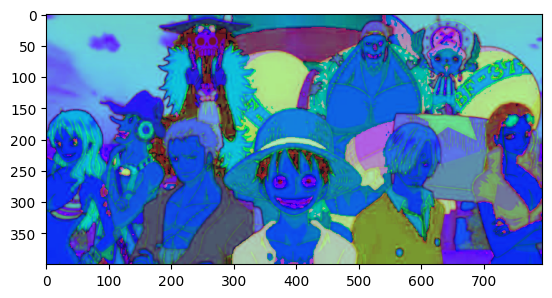

In [8]:
img = cv2.imread('C:/Users/DELL/PycharmProjects/DL/ATV_Training/2_OpenCV/data/OP.jpg')
img_HSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(img_HSV)

Cách tìm HSV color

In [12]:
green = np.uint8([[[0,255,0]]])
hsv = cv2.cvtColor(green ,cv2.COLOR_BGR2HSV)
print(hsv)

[[[ 60 255 255]]]


Khi đó có thể lấy (h-10, 100, 100) là lower bound và (h+10,255,255) là upper bound

### 2. Geometric Transformations of Images

#### 2.1 Scaling

cv2 có thể phóng to thu nhỏ bức ảnh theo tỉ lệ % (Ví dụ phóng to gấp đôi) bằng cách sử dụng cv2.resize().

Interpolation mode:
- INTER_AREA: Dùng để thu nhỏ
- INTER_CUBIC: Dùng để phóng to
- INTER_LINEAR: Dùng cho cả phóng to và thu nhỏ (Mặc định)

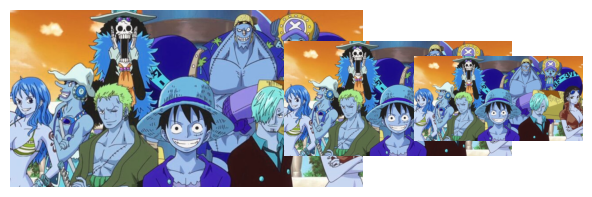

In [ ]:
img_res = cv2.resize(img, None, fx = 2, fy = 2, 
                     interpolation = cv2.INTER_CUBIC) # Tăng gấp đôi kích thước của ảnh
img_res2 = cv2. resize(img, None, fx = 0.5, fy = 0.5, 
                       interpolation = cv2.INTER_AREA) # Giảm 1 nửa kích thước của ảnh

plt.figure(figsize= (10,5))

plt.subplot(1,2,1)
plt.imshow(img_res)
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(img)
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(img_res2)
plt.axis('off')

plt.show()

#### 2.2 Translation (Tịnh tiến)

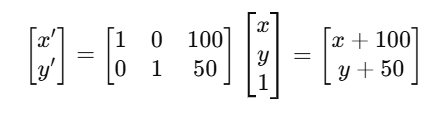

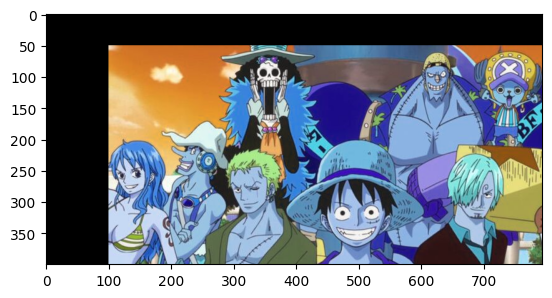

In [45]:
M = np.float32([[1, 0, 100], [0, 1, 50]]) # Dịch sang phải một khoảng (x,y) = (100, 50)

shifted = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))

plt.imshow(shifted)

#### 2.3 Rotation

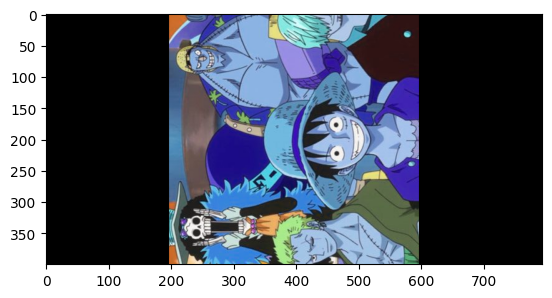

In [ ]:
w = img.shape[1]
h = img.shape[0]
M = cv2.getRotationMatrix2D((w/2,h/2),90,1) # Rotate 90 độ, w/2 và h/2 là toạ độ center của bức ảnh
img_rot = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
plt.imshow(img_rot)

#### 2.4 Perspective Transformation

- Dùng để thay đổi góc nhìn của bức ảnh như nhìn ở vị trí khác
- Cần phải tìm 4 điểm ở ảnh đầu vào và 4 điểm ở ảnh đầu ra sao cho không có 3 điểm nào trong 4 điểm thẳng hàng -> Dùng hàm cv2.getPerpectiveTransform() để tìm ma trận transform

In [49]:
img.shape

(400, 794, 3)

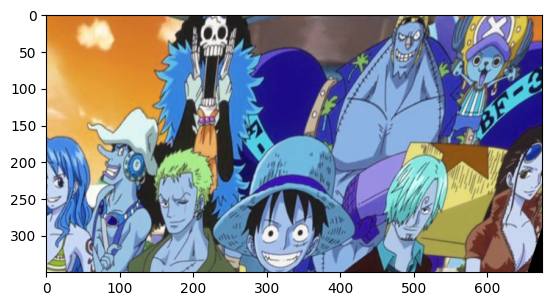

In [52]:
pts = np.float32([[25,25],[25,700],[375,25],[375,700]])
pts1 = np.float32([[0,0],[0,675],[350,0],[250,675]])
M = cv2.getPerspectiveTransform(pts,pts1)
pers_tran = cv2.warpPerspective(img, M, (675,350))
plt.imshow(pers_tran)

### 3. Image thresholding

Giải thích ngắn gọn là khi giá trị pixel vượt 1 ngưỡng thì nó sẽ được gán 1 giá trị (Có thể là màu trắng) nếu nhỏ hơn thì nó sẽ gán 1 giá trị khác (Ví dụ màu đen).

cv2.threshold(img, threshold, maxval, type)

Các type của threshold:
- cv2.THRESH_BINARY: Nhỏ hơn ngưỡng gán màu đen, lớn hơn ngưỡng gán màu trắng.
- cv2.THRESH_BINARY_INV: Ngược lại với bên trên.
- cv2.THRESH_TRUNC: Lớn hơn ngưỡng thì gán màu trắng, nhỏ hơn ngưỡng thì vẫn giữ nguyên giá trị ban đầu.
- cv2.THRESH_TOZERO: Nhỏ hơn ngưỡng thì gán màu đen, lớn hơn ngưỡng thì vẫn giữ nguyên giá trị ban đầu.
- cv2.THRESH_TOZERO_INV: Ngược lại với TOZERO.


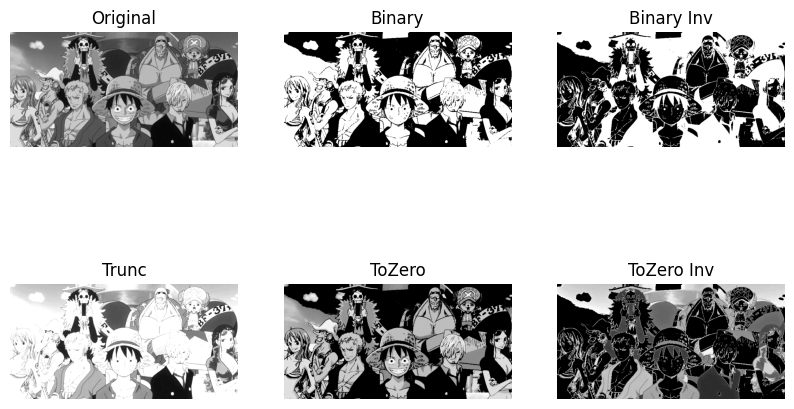

In [ ]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

_, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
_, th2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
_, th3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
_, th4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
_, th5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

titles = ["Original", "Binary", "Binary Inv", "Trunc", "ToZero", "ToZero Inv"]
images = [img, th1, th2, th3, th4, th5]

plt.figure(figsize=(10, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.axis("off")
plt.show()

Adaptive threshold được sử dụng khi bức ảnh có điều kiện sáng không đồng đều dẫn đến global value không hiệu quả, nên ta sử dụng các threshold khác nhau cho từng vùng riêng biệt.

cv2.adaptiveThreshold(img, maxVal, adaptiveMethod, thresholdType, blockSize, C).

adaptiveMethod:
- cv2.ADAPTIVE_THRESH_MEAN_C: Tính threshold bằng trung bình các giá trị lân cận với kích thước blockSize x blockSize trừ đi giá trị tinh chỉnh C.
- cv2.ADAPTIVE_THRESH_GAUSSIAN_C: Tính threshold bằng trung bình có trọng số Gaussian thau vì trung bình cộng. Trọng số Gaussian giúp giảm ảnh hưởng của pixel xa trung tâm.

Note: blockSize C phải là giá trị lẻ để có ô trung tâm.

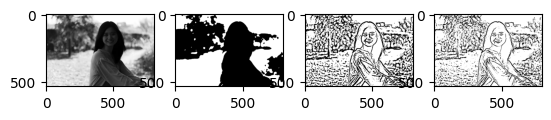

In [76]:
img_adap = cv2.imread('C:/Users/DELL/PycharmProjects/DL/ATV_Training/2_OpenCV/data/sample.jpg', cv2.IMREAD_GRAYSCALE)
img_adap = cv2.medianBlur(img_adap,5)
_, th1 = cv2.threshold(img_adap, 127, 255, cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img_adap, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
th3 = cv2.adaptiveThreshold(img_adap, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
img_list = [img_adap, th1, th2, th3]
for i in range(len(img_list)):
    plt.subplot(1,4,i+1)
    plt.imshow(img_list[i],'gray')
plt.show()

Otsu thresholding là phương pháp được sử dụng khi histogram của bức ảnh của có nhiều đỉnh. Khi đó, otsu threshold sẽ tự tính giá trị threshold phù hợp ở giữa 2 giá trị threshold đỉnh.

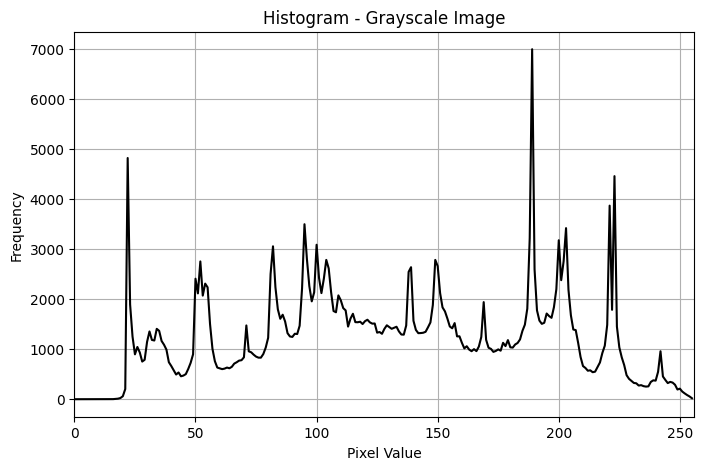

In [73]:
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

plt.figure(figsize=(8, 5))
plt.plot(hist, color='black')
plt.title("Histogram - Grayscale Image")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.xlim([0, 256])
plt.grid()
plt.show()

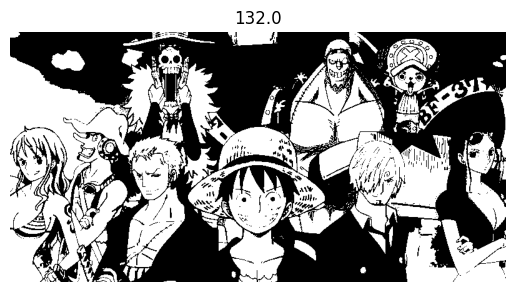

In [72]:
res, th_otsu = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(th_otsu,'gray')
plt.title(res)
plt.axis('off')
plt.show()

### 4. Image Smoothing

- cv2.blur(): Thay thế vị trí trung tâm bằng trung bình các pixel xung quanh, không hiệu quả với noise.
- cv2.GaussianBlur(): Gần giống với blur nhưng có trọng số để giảm bớt ảnh hưởng của pixel xa trung tâm.
- cv2.medianBlur(): Thay thế vị trí trung tâm bằng trung vị các vị trí xung quanh, hiệu quả với salt-and-pepper noise.

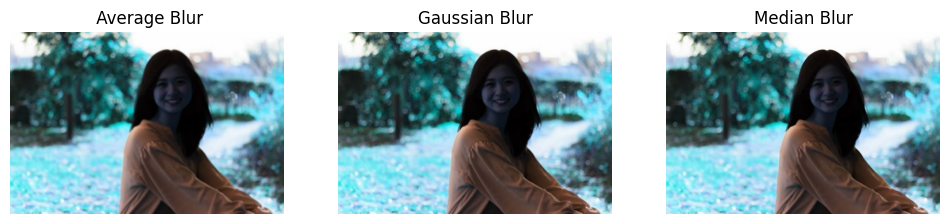

In [75]:
img_adap = cv2.imread('C:/Users/DELL/PycharmProjects/DL/ATV_Training/2_OpenCV/data/sample.jpg')
bl1 = cv2.blur(img_adap, (5,5))
bl2 = cv2.GaussianBlur(img_adap, (5,5), 0)
bl3 = cv2.medianBlur(img_adap,5)
img = [bl1, bl2, bl3]
title = [' Average Blur', 'Gaussian Blur', 'Median Blur']
plt.figure(figsize=(12,6))
for i in range(len(img)):
    plt.subplot(1,3,i+1)
    plt.imshow(img[i])
    plt.title(title[i])
    plt.axis('off')
plt.show()


### 5. Image Gradient

Sobel là phương pháp để tính đạo hàm bậc nhất của ảnh theo hướng x và y với 1 kernel size có thể define được, khi ksize = -1 thì ta sẽ sử dụng Scharr cho ra kết quả tốt hơn so với Sobel.

Laplacian là phương pháp đạo hàm bậc 2 giúp phát hiện cạnh tốt hơn nhưng dễ bị ảnh hưởng bởi nhiễu.

cv2.CV_64F chỉ ra rằng output nhận các giá trị số thực 64-bit floating point, có thể nhận cả số âm và số dương tốt hơn CV_8U - chỉ nhận số dương

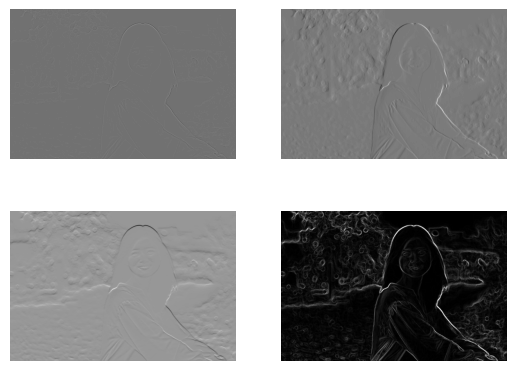

In [77]:
img_lapla = cv2.Laplacian(img_adap, cv2.CV_64F)
img_sobelx = cv2.Sobel(img_adap, cv2.CV_64F, 1, 0, (5,5))
img_sobely = cv2.Sobel(img_adap, cv2.CV_64F, 0, 1, (5,5))

grad_x = cv2.convertScaleAbs(img_sobelx)
grad_y = cv2.convertScaleAbs(img_sobely)

grad_combined = cv2.addWeighted(grad_x, 0.5, grad_y, 0.5, 0)

grad_list = [img_lapla, img_sobelx, img_sobely, grad_combined]

for i in range(len(grad_list)):
    plt.subplot(2,2,i+1)
    plt.imshow(grad_list[i],'gray')
    plt.axis('off')
plt.show()

### 6. Canny Edge Detection

Các bước:
1. Loại bỏ nhiễu bằng Gaussian filter
2. Tính gradient theo x và y bằng sobel và tính căn của tổng bình phương của chúng
3. Sau khi có gradient, thuật toán sẽ loại bỏ điểm không phải là cạnh thực sự bằng cách so sánh gradient của 1 pixel với 2 pixel liên kề theo hướng gradient, nếu pixel đó không phải lớn nhất, nó sẽ bị loại bỏ.
4. Dùng 2 thresholds để xác định cạnh mạnh, yếu:
  - Upper threshold: Nếu lớn hơn là cạnh chắc chắn.
  - Lower threshold: Nếu nhỏ hơn là cạnh yếu, chỉ được giữ lại nếu kết nối với cạnh chắc chắn

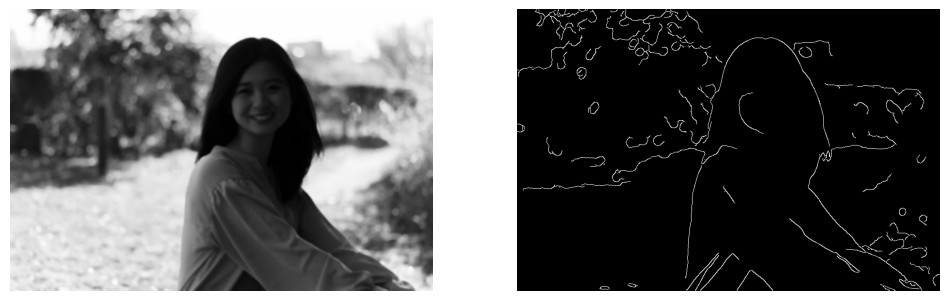

In [80]:
img_adap1 = cv2.GaussianBlur(img_adap, (5,5), 0)
img_canny = cv2.Canny(img_adap1, 50, 150)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(img_adap1, 'gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(img_canny, 'gray')
plt.axis('off')
plt.show()
